In [27]:
# Import packages
import pandas as pd

In [28]:
# Read in dataset
hb_df = pd.read_excel('Datasets/Employer Information.xlsx')
hb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89958 entries, 0 to 89957
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Line by line                89958 non-null  object 
 1   Fiscal Year                 89958 non-null  int64  
 2   Employer (Petitioner) Name  89949 non-null  object 
 3   Tax ID                      88567 non-null  float64
 4   Industry (NAICS) Code       78573 non-null  object 
 5   Petitioner City             89958 non-null  object 
 6   Petitioner State            89958 non-null  object 
 7   Petitioner Zip Code         89956 non-null  float64
 8   Initial Approval            89958 non-null  int64  
 9   Initial Denial              89958 non-null  int64  
 10  Continuing Approval         89958 non-null  int64  
 11  Continuing Denial           89958 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 8.2+ MB


In [29]:
# Tax revenue, innovation contributions (patents), a person's expenditure contribution?

In [30]:
hb_df.head()

,Line by line,Fiscal Year,Employer (Petitioner) Name,Tax ID,Industry (NAICS) Code,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
0,1,2024,1ST RANKING TECHNOLOGIES,3403.0,"54 - Professional, Scientific, and Technical S...",LEWISVILLE,TX,75067.0,4,0,3,0
1,2,2024,2M ASSOCIATES LLC,5521.0,"54 - Professional, Scientific, and Technical S...",DALLAS,TX,75240.0,1,0,0,0
2,3,2024,2M RESEARCH SERVICES LLC,3188.0,"54 - Professional, Scientific, and Technical S...",ARLINGTON,TX,76011.0,0,0,1,0
3,4,2024,2M SOLUTIONS INC,6900.0,56 - Administrative and Support and Waste Mana...,GRAND PRAIRIE,TX,75050.0,0,0,1,0
4,5,2024,3A INFOTECH LLC,6341.0,"54 - Professional, Scientific, and Technical S...",HOUSTON,TX,77069.0,5,0,0,0


In [31]:
# Create column called total
hb_df['Total'] = hb_df['Initial Approval'] + hb_df['Initial Denial']

In [32]:
hb_df.head()

,Line by line,Fiscal Year,Employer (Petitioner) Name,Tax ID,Industry (NAICS) Code,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Total
0,1,2024,1ST RANKING TECHNOLOGIES,3403.0,"54 - Professional, Scientific, and Technical S...",LEWISVILLE,TX,75067.0,4,0,3,0,4
1,2,2024,2M ASSOCIATES LLC,5521.0,"54 - Professional, Scientific, and Technical S...",DALLAS,TX,75240.0,1,0,0,0,1
2,3,2024,2M RESEARCH SERVICES LLC,3188.0,"54 - Professional, Scientific, and Technical S...",ARLINGTON,TX,76011.0,0,0,1,0,0
3,4,2024,2M SOLUTIONS INC,6900.0,56 - Administrative and Support and Waste Mana...,GRAND PRAIRIE,TX,75050.0,0,0,1,0,0
4,5,2024,3A INFOTECH LLC,6341.0,"54 - Professional, Scientific, and Technical S...",HOUSTON,TX,77069.0,5,0,0,0,5


In [33]:
employer_totals = hb_df.groupby("Employer (Petitioner) Name")["Total"].sum().reset_index().sort_values(by='Total', ascending=False)
employer_totals

,Employer (Petitioner) Name,Total
15128,INFOSYS LIMITED,31759
6900,COGNIZANT TECH SOLUTIONS US CORP,12441
6898,COGNIZANT TECH SOLNS US CORP,12282
15130,INFOSYS LTD,9736
15135,INFOSYS TECHNOLOGIES LIMITED,8456
...,...,...
17652,LASALLE GROUP INC,0
17653,LASER CLADDING SERVICES LLC,0
17654,LASER CLADDING SERVICES LTD,0
17659,LASSUS & ASSOCIATES INC,0


In [34]:
hb_df.columns

Index(['Line by line', 'Fiscal Year   ', 'Employer (Petitioner) Name',
       'Tax ID', 'Industry (NAICS) Code', 'Petitioner City',
       'Petitioner State', 'Petitioner Zip Code', 'Initial Approval',
       'Initial Denial', 'Continuing Approval', 'Continuing Denial', 'Total'],
      dtype='object')

In [35]:
# Strip spaces from 'Fiscal Year'
hb_df.columns = hb_df.columns.str.strip()

In [36]:
per_year = hb_df.groupby('Fiscal Year')['Total'].sum().reset_index()
per_year

,Fiscal Year,Total
0,2009,9514
1,2010,10078
2,2011,12429
3,2012,15978
4,2013,17410
5,2014,20527
6,2015,16653
7,2016,16252
8,2017,14794
9,2018,11686


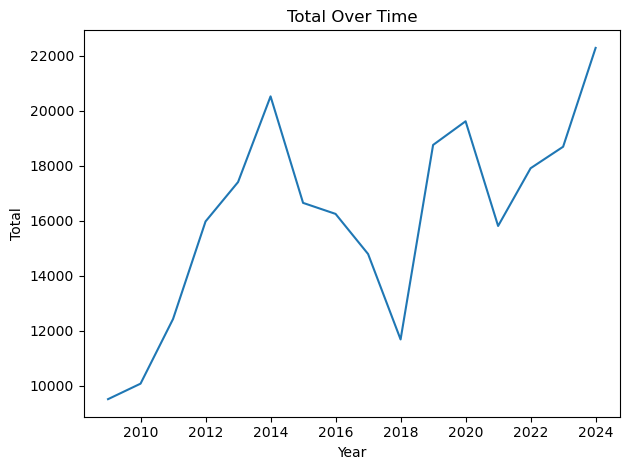

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data= per_year, x='Fiscal Year', y='Total')
plt.title('Total Over Time')
plt.xlabel('Year')
plt.ylabel('Total')
plt.tight_layout()

We will continue our analysis for H1B in class for this assignment.

Given what we have done in class, please do the following.

1. I collected two pieces of information about Texas economic development over 2009 - 2024: GDP (tx_gdp) and Unemployment rate (tx_ur) and saved them in this csv file. Texas economy.csv Download Texas economy.csv. Import it. 

2. Use the variable 'GDP Deflator' to calculate the real GDP. The variable sets the 2017 dollar value at 100. By dividing the nominal GDP with this deflator, we get the real GDP, all in 2017 dollar value. Please create this real GDP variable.

3. Calculate the numbers of Initial Approvals and Continuing Approvals of every year. Make graphs that compare each of them with Texas GDP and unemployment rate. What do you find?

4. As H1B visa can only be valid for six years, we may need the most recent six years' data to estimate the current number of employees. Get the subset of the most recent six years. Using the subset, find the total number of H1B employees across industries. Which industry has the highest number of employees? Try make a graph.

5. Using the subset, find the total number of H1B employees across cities. What are the top ten cities?

6. In class, we found that 'COGNIZANT' company has different names. Please replace the different names with the same name. Then using the subset, find the sum of H1B employees from each petitioner. 

In [38]:
# Load in Texas economic development csv
texas_df = pd.read_csv('Datasets/Texas economy.csv')
print(texas_df.info())
print(texas_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fiscal Year   16 non-null     int64  
 1   GDP Deflator  16 non-null     float64
 2   tx_gdp        16 non-null     float64
 3   tx_ur         16 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 644.0 bytes
None
Index(['Fiscal Year', 'GDP Deflator', 'tx_gdp', 'tx_ur'], dtype='object')


In [39]:
texas_df.head(10)

,Fiscal Year,GDP Deflator,tx_gdp,tx_ur
0,2009,88.556,1179168.1,7.591667
1,2010,89.632,1255660.8,8.250000
2,2011,91.481,1351776.9,8.033333
3,2012,93.185,1429588.0,6.708333
4,2013,94.771,1526781.9,6.316667
5,2014,96.421,1592177.6,5.183333
6,2015,97.316,1585985.9,4.466667
7,2016,98.241,1582981.5,4.666667
8,2017,100.000,1667313.0,4.358333
9,2018,102.291,1808026.9,3.916667


In [40]:
# Calculating real gdp
texas_df['real_gdp'] = round(texas_df['tx_gdp'] / (texas_df['GDP Deflator'] / 100), 1)
texas_df.head(10)

,Fiscal Year,GDP Deflator,tx_gdp,tx_ur,real_gdp
0,2009,88.556,1179168.1,7.591667,1331550.8
1,2010,89.632,1255660.8,8.250000,1400906.8
2,2011,91.481,1351776.9,8.033333,1477658.6
3,2012,93.185,1429588.0,6.708333,1534139.6
4,2013,94.771,1526781.9,6.316667,1611022.3
5,2014,96.421,1592177.6,5.183333,1651276.8
6,2015,97.316,1585985.9,4.466667,1629727.8
7,2016,98.241,1582981.5,4.666667,1611324.7
8,2017,100.000,1667313.0,4.358333,1667313.0
9,2018,102.291,1808026.9,3.916667,1767532.7


In [41]:
# Initial and continuing approvals per year
approvals_peryear = hb_df.groupby('Fiscal Year')[['Initial Approval', 'Continuing Approval']].sum().reset_index()
approvals_peryear

,Fiscal Year,Initial Approval,Continuing Approval
0,2009,8359,13221
1,2010,9432,11039
2,2011,11855,17714
3,2012,15362,14776
4,2013,16484,19820
5,2014,19275,34212
6,2015,15661,32652
7,2016,14927,47805
8,2017,12404,57494
9,2018,6954,31671


In [42]:
# Combine new df with texas economy df for visualization
texas_approvals = texas_df.merge(approvals_peryear, on='Fiscal Year', how='left')
texas_approvals

,Fiscal Year,GDP Deflator,tx_gdp,tx_ur,real_gdp,Initial Approval,Continuing Approval
0,2009,88.556,1179168.1,7.591667,1331550.8,8359,13221
1,2010,89.632,1255660.8,8.250000,1400906.8,9432,11039
2,2011,91.481,1351776.9,8.033333,1477658.6,11855,17714
3,2012,93.185,1429588.0,6.708333,1534139.6,15362,14776
4,2013,94.771,1526781.9,6.316667,1611022.3,16484,19820
5,2014,96.421,1592177.6,5.183333,1651276.8,19275,34212
6,2015,97.316,1585985.9,4.466667,1629727.8,15661,32652
7,2016,98.241,1582981.5,4.666667,1611324.7,14927,47805
8,2017,100.000,1667313.0,4.358333,1667313.0,12404,57494
9,2018,102.291,1808026.9,3.916667,1767532.7,6954,31671


In [ ]:
# Create YOY percent change columns for better comparison
texas_approvals['Initial Approval % Change'] = texas_approvals['Initial Approval'].pct_change() * 100
texas_approvals['Continuing Approval % Change'] = texas_approvals['Continuing Approval'].pct_change() * 100
texas_approvals['Real GDP % Change'] = texas_approvals['real_gdp'].pct_change() * 100
texas_approvals['Unemployment Rate % Change'] = texas_approvals['tx_ur'].pct_change() * 100
texas_approvals.head()


,Fiscal Year,GDP Deflator,tx_gdp,tx_ur,real_gdp,Initial Approval,Continuing Approval,Initial Approval % Change,Continuing Approval % Change,Real GDP % Change,Unemployment Rate % Change
0,2009,88.556,1179168.1,7.591667,1331550.8,8359,13221,NaN,NaN,NaN,NaN
1,2010,89.632,1255660.8,8.250000,1400906.8,9432,11039,12.836464,-16.504047,5.208663,8.671789
2,2011,91.481,1351776.9,8.033333,1477658.6,11855,17714,25.689143,60.467434,5.478723,-2.626263
3,2012,93.185,1429588.0,6.708333,1534139.6,15362,14776,29.582455,-16.585751,3.822331,-16.493776
4,2013,94.771,1526781.9,6.316667,1611022.3,16484,19820,7.303736,34.136437,5.011454,-5.838509


#### Do first time H1-B approvals follow any pattern with Texas GDP?

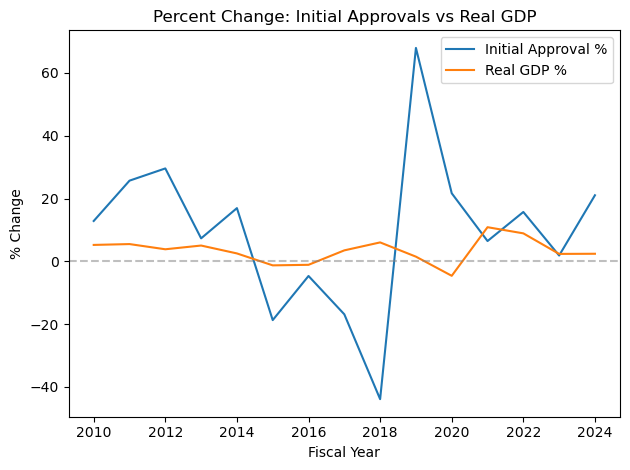

In [47]:
sns.lineplot(data=texas_approvals, x='Fiscal Year', y='Initial Approval % Change', label='Initial Approval %')
sns.lineplot(data=texas_approvals, x='Fiscal Year', y='Real GDP % Change', label='Real GDP %')
plt.axhline(0, linestyle='--', color='gray', alpha=0.5)
plt.title('Percent Change: Initial Approvals vs Real GDP')
plt.ylabel('% Change')
plt.legend()
plt.tight_layout()


#### Do H1-B renewals follow any pattern with the unemployment rate in Texas?

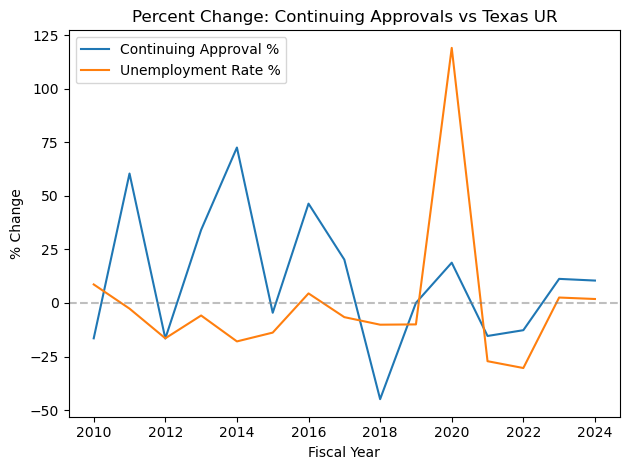

In [46]:
sns.lineplot(data=texas_approvals, x='Fiscal Year', y='Continuing Approval % Change', label='Continuing Approval %')
sns.lineplot(data=texas_approvals, x='Fiscal Year', y='Unemployment Rate % Change', label='Unemployment Rate %')
plt.axhline(0, linestyle='--', color='gray', alpha=0.5)
plt.title('Percent Change: Continuing Approvals vs Texas UR')
plt.ylabel('% Change')
plt.legend()
plt.tight_layout()


The YOY percent change analysis reveals that Initial H1B Approvals are highly volatile and do not follow Texas GDP growth, suggesting that new H1B demand is influenced more by policy changes or filing cycles than by state-level economic performance. In contrast, Continuing Approvals show a moderate inverse relationship with the unemployment rate. This is very evident in 2020, when unemployment spiked and continuing approvals declined, indicating that renewals and extensions may be more sensitive to labor market conditions.